In [1]:
from diagrams import Diagram
from diagrams.programming.language import Python
from diagrams.generic.storage import Storage
from IPython import display

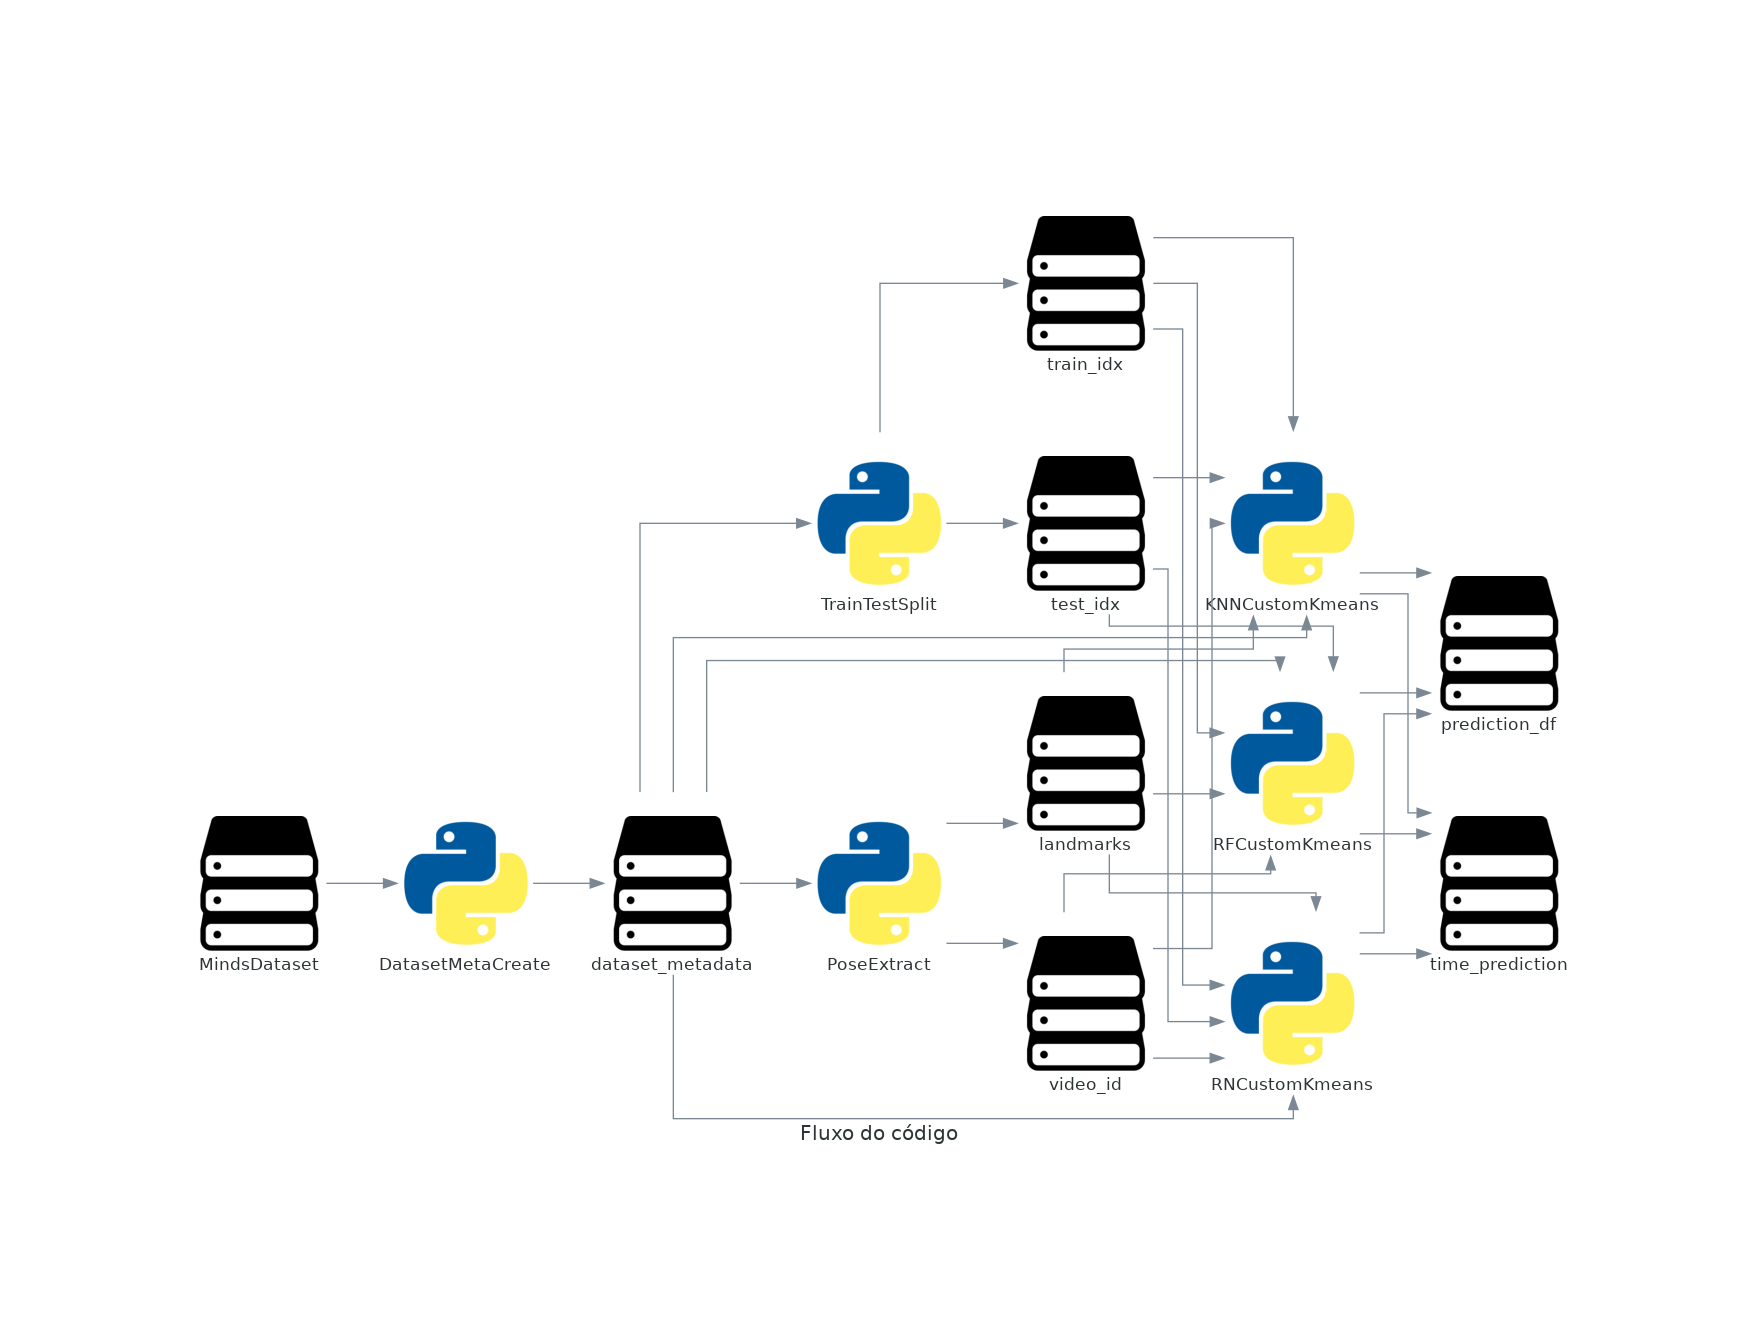

In [2]:
diagram_filename = 'Outs/FluxoDoCodigo'

with Diagram('Fluxo do código', show=False, outformat='png', filename=diagram_filename):
    minds_dataset = Storage('MindsDataset')
    dataset_metadata = Storage('dataset_metadata')
    video_id = Storage('video_id')
    landmarks = Storage('landmarks')
    train_idx = Storage('train_idx')
    test_idx = Storage('test_idx')
    prediction_df = Storage('prediction_df')
    time_prediction = Storage('time_prediction')
    outs_prediction = [prediction_df, time_prediction]
    train_evaluate_data = [dataset_metadata, landmarks, video_id, train_idx, test_idx]
    minds_dataset >> Python('DatasetMetaCreate') >> dataset_metadata >> Python('PoseExtract') >> [video_id, landmarks]
    dataset_metadata >> Python('TrainTestSplit') >> [train_idx, test_idx]
    train_evaluate_data >> Python('KNNCustomKmeans') >> outs_prediction
    train_evaluate_data >> Python('RFCustomKmeans') >> outs_prediction
    train_evaluate_data >> Python('RNCustomKmeans') >> outs_prediction
display.Image(f'{diagram_filename}.png')

O `DatasetMetaCreate` gera o dataframe `dataset_metadata` com a localização de cada imagem, e seu dados, como gesto e sinalizador, que é lido pelo `PoseExtract` que extrai as posições usando a lib [mediapipe](https://developers.google.com/mediapipe) e gerando o dataset com a movimentação de cada vídeo, e qual vídeo ele se refere.